In [ ]:
# Mount Google Drive (if not already done)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define folder paths
import os

# Path to the ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge (2018)/rsna-pneumonia-detection-challenge.zip"

# Directory where it will be extracted
extract_dir = "/content/drive/MyDrive/RSNA_Pneumonia_Extracted"

# Create the extraction directory if it doesn't already exist
os.makedirs(extract_dir, exist_ok=True)

In [ ]:
# Unzip the ZIP file
import zipfile

# Extract the files from the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✔️ Files extracted to:", extract_dir)

✔️ Arquivos extraídos em: /content/drive/MyDrive/RSNA_Pneumonia_Extracted


In [ ]:
# Check if the files were extracted correctly
# List the first extracted files
print("Extracted files:")
print(os.listdir(extract_dir)[:10])  # Display the first 10 files

# List subfolders and main files
for root, dirs, files in os.walk(extract_dir):
    print("📂 Folder:", root)
    print("📁 Subfolders:", dirs)
    print("📄 Files:", files[:5])  # Show only the first 5 files
    print("-" * 50)
    break  # Show only the top-level structure

Arquivos extraídos:
['GCP Credits Request Link - RSNA.txt', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_test_images', 'stage_2_train_images', 'stage_2_train_labels.csv']
📂 Pasta: /content/drive/MyDrive/RSNA_Pneumonia_Extracted
📁 Subpastas: ['stage_2_test_images', 'stage_2_train_images']
📄 Arquivos: ['GCP Credits Request Link - RSNA.txt', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_train_labels.csv']
--------------------------------------------------


In [ ]:
# 5Locate the DICOM Files

dicom_dir = os.path.join(extract_dir, "stage_2_train_images")  # Adjust as needed
print("📂 DICOM Folder:", dicom_dir)

# List some DICOM files
print(os.listdir(dicom_dir)[:10])  # Display the first 10 DICOM files

📂 Pasta dos DICOMs: /content/drive/MyDrive/RSNA_Pneumonia_Extracted/stage_2_train_images
['0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm', '000924cf-0f8d-42bd-9158-1af53881a557.dcm', '000db696-cf54-4385-b10b-6b16fbb3f985.dcm', '000fe35a-2649-43d4-b027-e67796d412e0.dcm', '001031d9-f904-4a23-b3e5-2c088acd19c6.dcm', '0010f549-b242-4e94-87a8-57d79de215fc.dcm', '001916b8-3d30-4935-a5d1-8eaddb1646cd.dcm', '0022073f-cec8-42ec-ab5f-bc2314649235.dcm', '0022995a-45eb-4cfa-9a59-cd15f5196c64.dcm', '0025d2de-bd78-4d36-9f72-e15a5e22ca82.dcm']


In [ ]:
#!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.1 MB/s eta 0:00:00


In [ ]:
# Convert DICOM to PNG

import pydicom
import numpy as np
from PIL import Image
from tqdm import tqdm

# Directory where the PNGs will be saved
png_output_dir = "/content/drive/MyDrive/RSNA_Pneumonia_PNG"

# Create the output directory if it doesn't exist
os.makedirs(png_output_dir, exist_ok=True)

# Iterate through the DICOM files and convert them to PNG
for file_name in tqdm(os.listdir(dicom_dir)):
    if file_name.endswith(".dcm"):
        dicom_path = os.path.join(dicom_dir, file_name)
        png_path = os.path.join(png_output_dir, file_name.replace(".dcm", ".png"))

        # Load the DICOM file
        dicom_image = pydicom.dcmread(dicom_path)
        img_array = dicom_image.pixel_array

        # Normalize to 0-255
        img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255.0
        img_array = img_array.astype(np.uint8)

        # Save as PNG
        Image.fromarray(img_array).save(png_path)

print("✔️ Conversion completed! PNGs saved to:", png_output_dir)

100%|██████████| 26684/26684 [2:17:26<00:00,  3.24it/s]

✔️ Conversão concluída! PNGs salvos em: /content/drive/MyDrive/RSNA_Pneumonia_PNG


In [ ]:
# Verify Converted PNGs
print("Generated PNG files:")
print(os.listdir(png_output_dir)[:10])  # Display the first 10 files

Arquivos PNG gerados:
['0004cfab-14fd-4e49-80ba-63a80b6bddd6.png', '000924cf-0f8d-42bd-9158-1af53881a557.png', '000db696-cf54-4385-b10b-6b16fbb3f985.png', '000fe35a-2649-43d4-b027-e67796d412e0.png', '001031d9-f904-4a23-b3e5-2c088acd19c6.png', '0010f549-b242-4e94-87a8-57d79de215fc.png', '001916b8-3d30-4935-a5d1-8eaddb1646cd.png', '0022073f-cec8-42ec-ab5f-bc2314649235.png', '0022995a-45eb-4cfa-9a59-cd15f5196c64.png', '0025d2de-bd78-4d36-9f72-e15a5e22ca82.png']


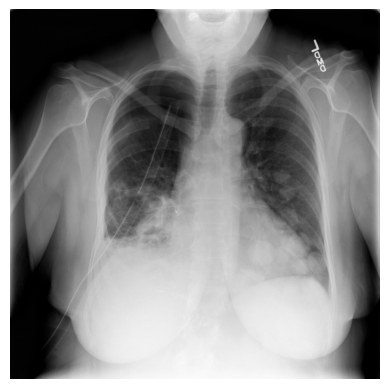

In [ ]:
import matplotlib.pyplot as plt

# Choose a random PNG
sample_png = os.listdir(png_output_dir)[0]
sample_path = os.path.join(png_output_dir, sample_png)

# Open and display the image
img = Image.open(sample_path)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
import os

# Define the paths of the two folders
dicom_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images"
png_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images_PNG"

# Count the number of files in each folder
num_dicom = len([f for f in os.listdir(dicom_dir) if f.endswith(".dcm")])
num_png = len([f for f in os.listdir(png_dir) if f.endswith(".png")])

# Display the results
print(f"Number of DICOM images: {num_dicom}")
print(f"Number of PNG images: {num_png}")

Número de imagens DICOM: 26684
Número de imagens PNG: 26684


In [ ]:
# Define the path to the folder containing the PNG images
png_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images_PNG"

# List the first 10 files in the folder
png_files = sorted(os.listdir(png_dir))[:10]

# Display the names of the first files
print("First 10 files in the PNG folder:")
for file in png_files:
    print(file)

Primeiros 10 arquivos na pasta PNG:
0004cfab-14fd-4e49-80ba-63a80b6bddd6.png
000924cf-0f8d-42bd-9158-1af53881a557.png
000db696-cf54-4385-b10b-6b16fbb3f985.png
000fe35a-2649-43d4-b027-e67796d412e0.png
001031d9-f904-4a23-b3e5-2c088acd19c6.png
0010f549-b242-4e94-87a8-57d79de215fc.png
001916b8-3d30-4935-a5d1-8eaddb1646cd.png
0022073f-cec8-42ec-ab5f-bc2314649235.png
0022995a-45eb-4cfa-9a59-cd15f5196c64.png
0025d2de-bd78-4d36-9f72-e15a5e22ca82.png


In [ ]:
# Calculate the average pixel dimensions of the PNG images
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Define the path to the folder containing the PNG images
png_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images_PNG"

# List all PNG files in the folder
png_files = [f for f in os.listdir(png_dir) if f.endswith(".png")]

# Initialize lists to store widths and heights
widths = []
heights = []

# Iterate through the images and collect their dimensions
for file_name in tqdm(png_files[:50]):  # Analyze up to 50 images for efficiency
    img_path = os.path.join(png_dir, file_name)
    img = Image.open(img_path)
    width, height = img.size
    widths.append(width)
    heights.append(height)

# Calculate averages
avg_width = np.mean(widths)
avg_height = np.mean(heights)

# Display the results
print(f"Average image width: {avg_width:.2f} pixels")
print(f"Average image height: {avg_height:.2f} pixels")

100%|██████████| 50/50 [00:40<00:00,  1.24it/s]

Média de largura das imagens: 1024.00 pixels
Média de altura das imagens: 1024.00 pixels


In [ ]:
# Path to the main folder
base_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge"

# List the files and subfolders within the main directory
contents = os.listdir(base_dir)

# Display the contents
print("Contents of the RSNA Pneumonia Detection Challenge folder:")
for item in contents:
    item_path = os.path.join(base_dir, item)
    if os.path.isdir(item_path):
        print(f"📂 {item} (Folder)")
    else:
        print(f"📄 {item} (File)")

Conteúdo da pasta RSNA Pneumonia Detection Challenge:
📄 GCP Credits Request Link - RSNA.txt (Arquivo)
📄 stage_2_detailed_class_info.csv (Arquivo)
📄 stage_2_sample_submission.csv (Arquivo)
📂 stage_2_test_images (Pasta)
📂 stage_2_train_images (Pasta)
📄 stage_2_train_labels.csv (Arquivo)
📂 stage_2_train_images_PNG (Pasta)


In [ ]:
import shutil

png_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images_PNG"
zip_path = "/content/drive/MyDrive/RSNA_PNG_Images.zip"

# Create a ZIP archive of the PNG folder
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', png_dir)

print("✔️ Files compressed and ready for download!")

✔️ Arquivos compactados e prontos para download!


In [ ]:
# Code to calculate the size of the PNG folder

# Path to the folder containing the PNG images
png_dir = "/content/drive/MyDrive/RSNA Pneumonia Detection Challenge/stage_2_train_images_PNG"

# Calculate the total size of the folder in bytes
total_size = 0
for dirpath, dirnames, filenames in os.walk(png_dir):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        total_size += os.path.getsize(fp)

# Convert to MB and GB
total_size_mb = total_size / (1024 * 1024)  # Size in MB
total_size_gb = total_size_mb / 1024  # Size in GB

# Display the result
print(f"Total size of the PNG folder: {total_size_mb:.2f} MB ({total_size_gb:.2f} GB)")

Tamanho total da pasta PNG: 9286.81 MB (9.07 GB)
